# G2M insight for Cab Investment firm - Exploratory Data Analysis

## by Roger Burek-Bors - February 20, 2021 - Warsaw, Poland 

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Libraries loaded")

Libraries loaded


In [2]:
# Building dataframes
cities = pd.read_csv('City.csv')
cabs = pd.read_csv('Cab_Data.csv')
customers = pd.read_csv('Customer_ID.csv')
transactions = pd.read_csv('Transaction_ID.csv')
print("Data loaded")

Data loaded


In [3]:
# Checking data format and size
print(cities.head())
print("Size of 'Cities':", cities.shape)
print()
print(cabs.head())
print("Size of 'Cabs':", cabs.shape)
print()
print(customers.head())
print("Size of 'Customers':", customers.shape)
print()
print(transactions.head())
print("Size of 'Transactions':", transactions.shape)

             City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247
Size of 'Cities': (20, 3)

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
Size of 'Cabs': (359392, 7)

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28      

In [4]:
# Checking for missing data
print(cities.isna().sum())
print()
print(cabs.isna().sum())
print()
print(customers.isna().sum())
print()
print(transactions.isna().sum())

City          0
Population    0
Users         0
dtype: int64

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There is no missing data (NaN)

In [5]:
# Checking for duplicate values
print(cities['City'].is_unique)
print()
print(cabs['Transaction ID'].is_unique)
print()
print(customers['Customer ID'].is_unique)
print()
print(transactions['Transaction ID'].is_unique)

True

True

True

True


There is no duplication in data

In [6]:
colors = ['r', 'y']

### Hypothesis no. 1: bigger cities have more cab users

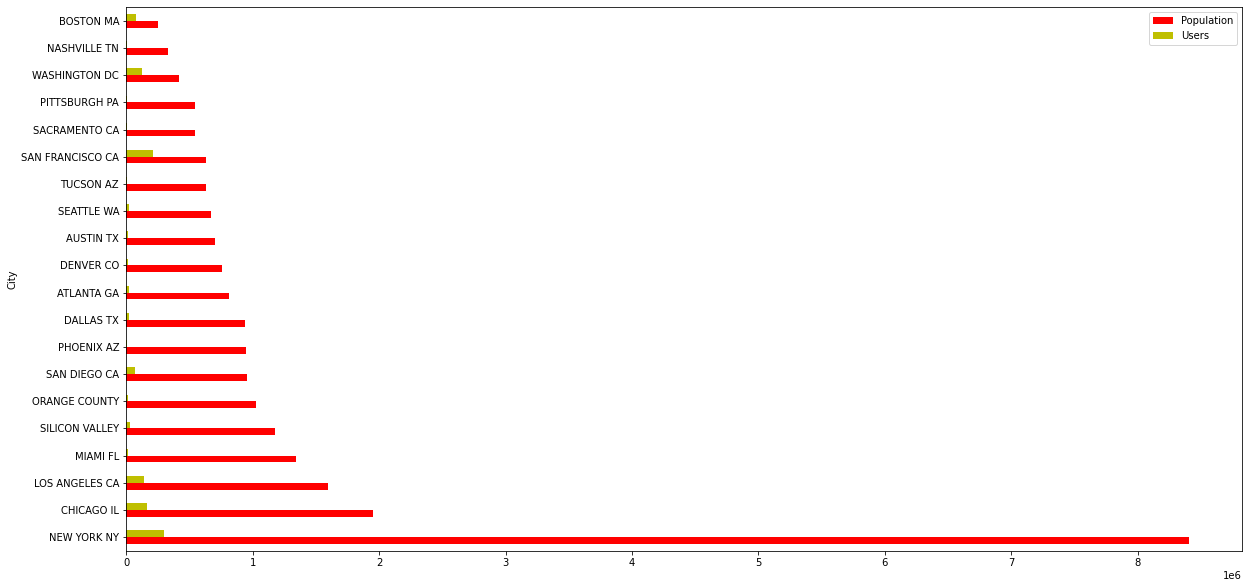

In [7]:
cities.plot.barh(x='City', figsize=(20,10), color = colors)

In [8]:
cities['Users_100k'] = cities['Users'] * 100000 / cities['Population']

In [9]:
cities

,City,Population,Users,Users_100k
0,NEW YORK NY,8405837,302149,3594.514145
1,CHICAGO IL,1955130,164468,8412.126048
2,LOS ANGELES CA,1595037,144132,9036.279409
3,MIAMI FL,1339155,17675,1319.862152
4,SILICON VALLEY,1177609,27247,2313.756094
5,ORANGE COUNTY,1030185,12994,1261.326849
6,SAN DIEGO CA,959307,69995,7296.412931
7,PHOENIX AZ,943999,6133,649.682892
8,DALLAS TX,942908,22157,2349.858099
9,ATLANTA GA,814885,24701,3031.225265


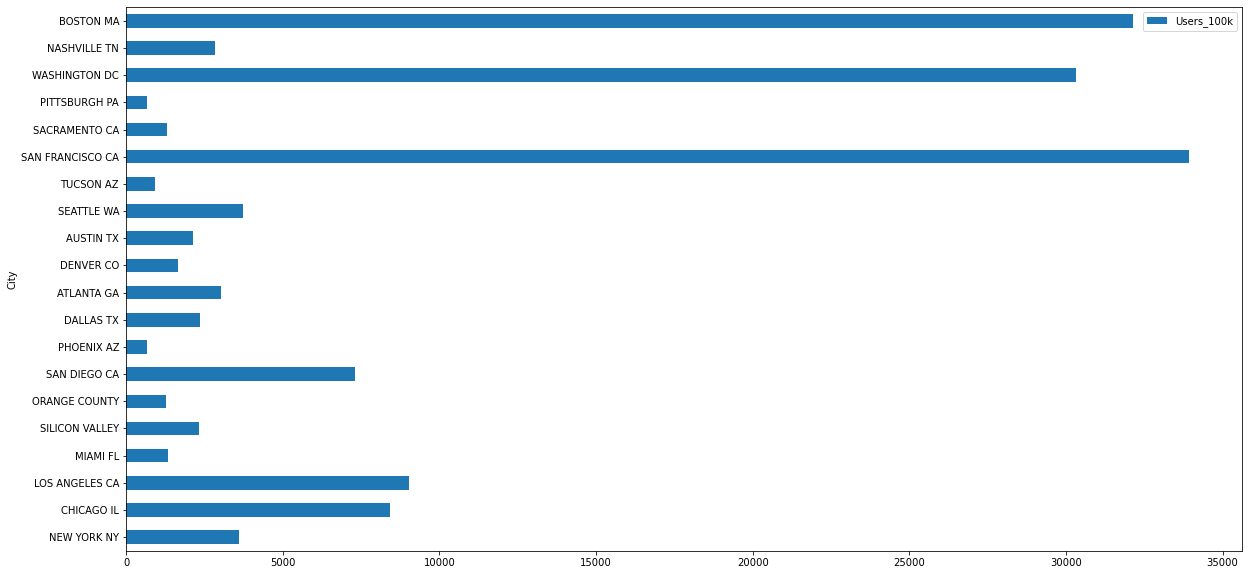

In [10]:
cities.plot.barh(x='City', y='Users_100k', figsize=(20,10))

Thesis no 1: size of the city does not determine quantity of cab users. 
There are cities like San Franciso, Boston or Washington D.C. to have more cab users per 100k citizens than much bigger cities.

### Hypothesis no. 2: bigger cities provide more profit and equal opportunities to cab companies

In [11]:
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [12]:
cabs2 = cabs.drop(['Transaction ID', 'Date of Travel', 'KM Travelled'], axis=1)

In [13]:
cabs2.head()

,Company,City,Price Charged,Cost of Trip
0,Pink Cab,ATLANTA GA,370.95,313.635
1,Pink Cab,ATLANTA GA,358.52,334.854
2,Pink Cab,ATLANTA GA,125.20,97.632
3,Pink Cab,ATLANTA GA,377.40,351.602
4,Pink Cab,ATLANTA GA,114.62,97.776


In [14]:
# Size of market in particular city
cabs2 = cabs2.groupby(['City'])['Price Charged'].sum()

In [15]:
cabs2.head()

City
ATLANTA GA     2980241.72
AUSTIN TX      1877142.50
BOSTON MA     10359755.42
CHICAGO IL    19841318.52
DALLAS TX      3142429.91
Name: Price Charged, dtype: float64

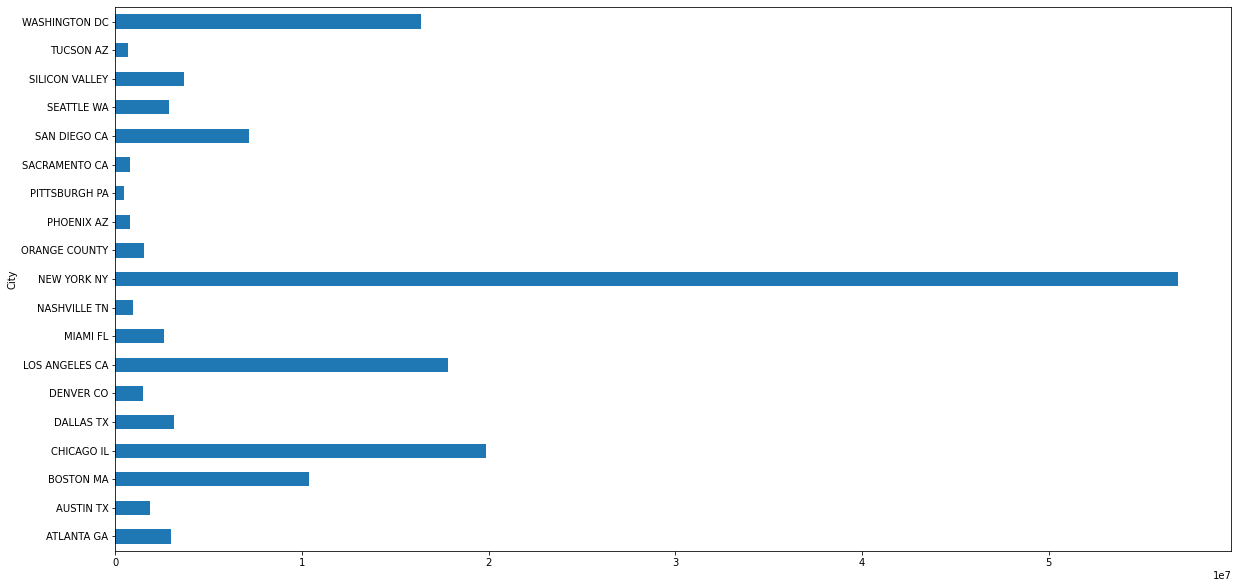

In [16]:
cabs2.plot.barh(x='Company', figsize=(20,10))

In [17]:
# Competition in particular city
cabs3 = cabs.drop(['Transaction ID', 'Date of Travel', 'KM Travelled'], axis=1)
cabs3 = cabs3.groupby(['City', 'Company'])['Price Charged'].sum()

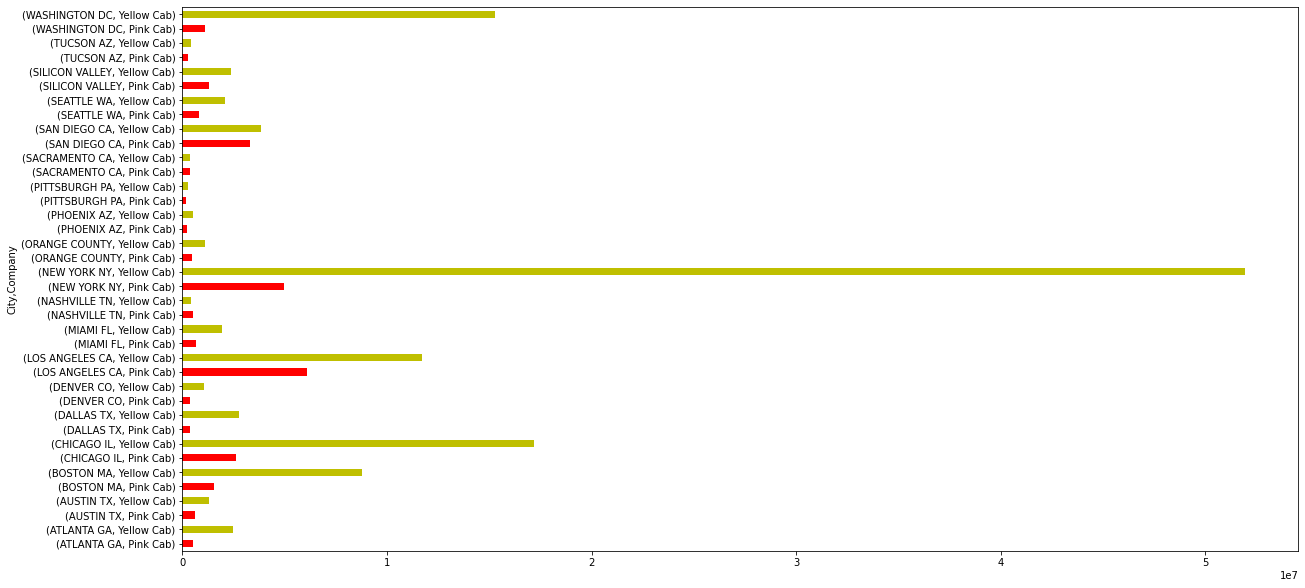

In [18]:
cabs3.plot.barh(x='City', figsize=(20,10), stacked=True, color = colors)

Thesis no. 2: big cities provide in general bigger cab market however Washington D.C. and Boston are very similar to much bigger Chicago or Los Angeles in terms of cab market. Smaller cities usueally provide better level playing field for cab companies. New York and Chicago are dominated by one cab company. Yellow cab has stronger presence in majorty of cities.

### Hypothesis no. 3: costs for cab companies are lower in big cities

In [19]:
# Calculating a global mean cost picture for both companies
cabs.groupby(['Company'])['Cost of Trip'].mean()

Company
Pink Cab      248.148682
Yellow Cab    297.922004
Name: Cost of Trip, dtype: float64

In [20]:
# Calculating a global mean cost per 1 km for both companies
cost_per_km = cabs
cost_per_km['Cost per 1km'] = cost_per_km['Cost of Trip'] / cost_per_km['KM Travelled'] 
cost_per_km.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2


In [21]:
cost_per_km.groupby(['Company'])['Cost per 1km'].mean()

Company
Pink Cab      10.998602
Yellow Cab    13.200565
Name: Cost per 1km, dtype: float64

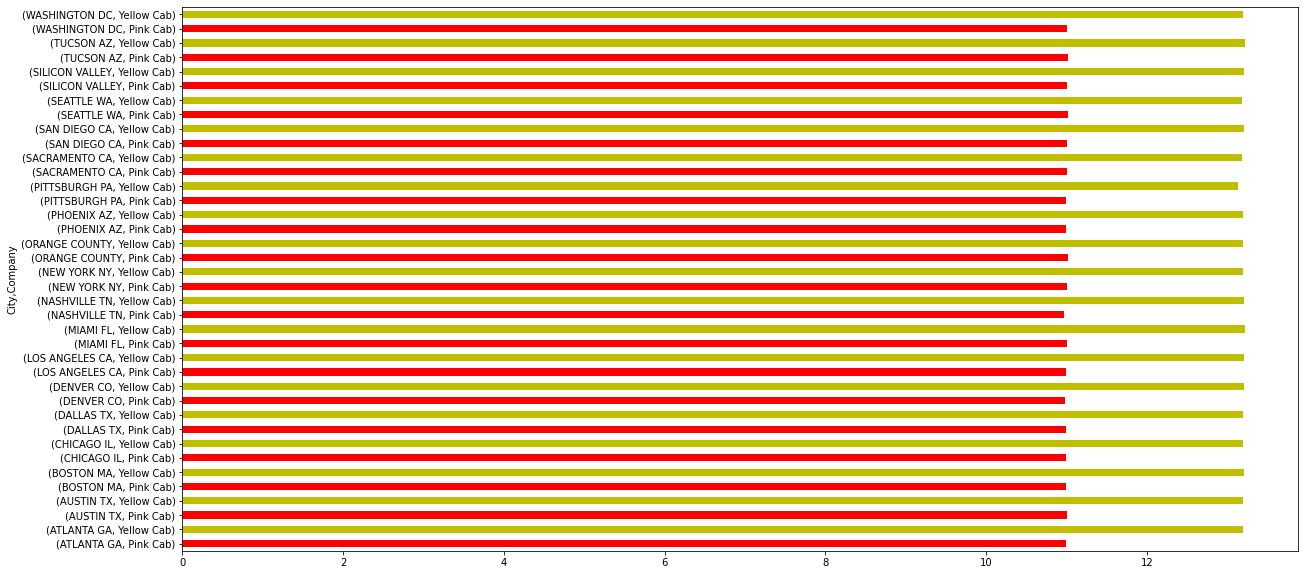

In [22]:
# Calculating a cost per 1 km in particular cities
cost_per_km.groupby(['City', 'Company'])['Cost per 1km'].mean().plot.barh(x='City', figsize=(20,10), color = colors)

Thesis no. 3: Size of city has no impact on cab costs. Pink cabs have lower mean global cost and cost per 1km of ride.

### Hypothesis no. 4: drivers in smaller cities have shorter rides than in bigger ones

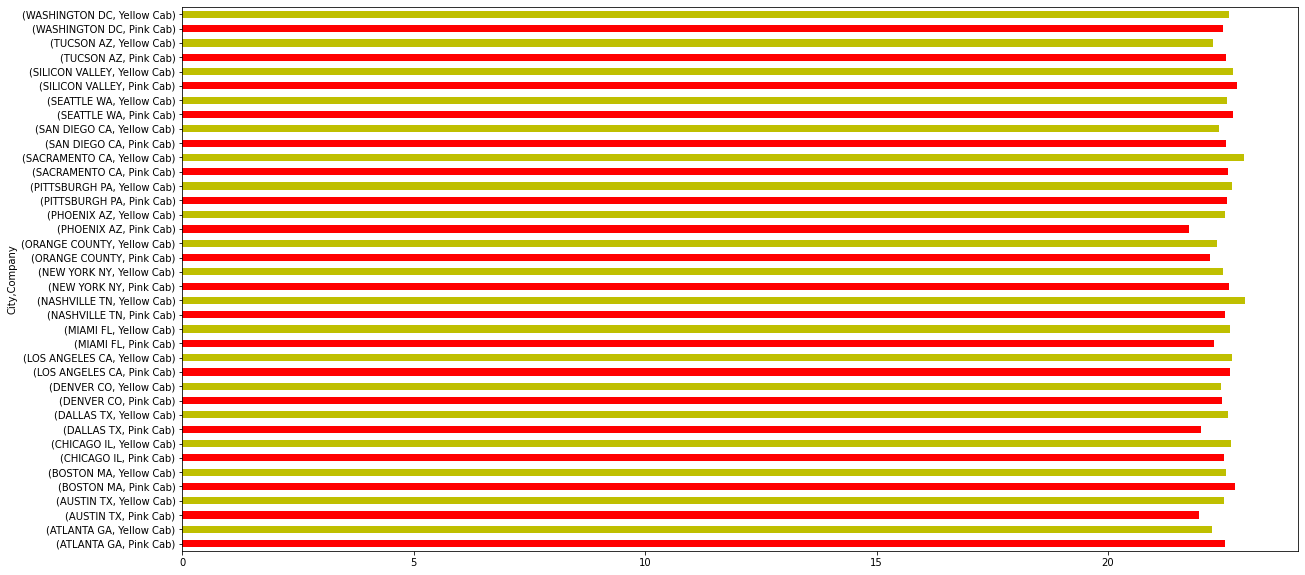

In [23]:
# Calculating a mean ride distance for each city and cab company
cost_per_km.groupby(['City', 'Company'])['KM Travelled'].mean().plot.barh(x='City', figsize=(20,10), color = colors)

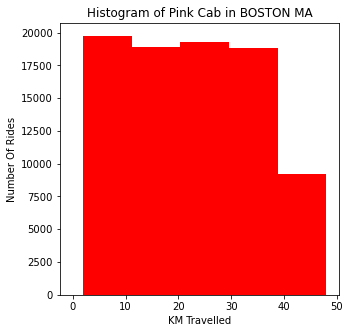

In [24]:
# To support above, generating histograms for each company
company = ['Yellow Cab', 'Pink Cab']
city = ['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL', 'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA',
        'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA',
        'SACRAMENTO CA', 'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA']
for i in company:
    cost_per_comp = cost_per_km.loc[cost_per_km['Company'] == i]
    for j in city:
        cost_per_comp = cost_per_comp.loc[cost_per_km['City'] == j]
        cost_per_comp['KM Travelled'].plot(kind='hist',
                                           bins=5,
                                           title=f'Histogram of {i} in {j}',
                                           figsize=(5,5),
                                           color=colors)
        plt.xlabel('KM Travelled')
        plt.ylabel("Number Of Rides")

### Hypothesis no. 5: customers like to pay by cash

In [25]:
# How customer pays for service (number of transactions in global)?
card_or_cash1 = transactions['Payment_Mode'].value_counts()
card_or_cash1

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

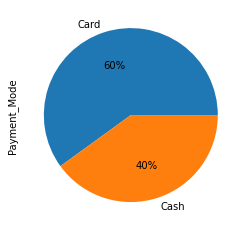

In [26]:
card_or_cash1.plot.pie(autopct='%.0f%%')

In [27]:
# What brings more revenue - cash or card payments?
cabs4 = cabs[['Transaction ID', 'Price Charged']]
# Merging 2 dataframes - "Cabs" and "Transactions"
transactions2 = transactions.merge(cabs4, on='Transaction ID', how='left')
transactions2.head()

,Transaction ID,Customer ID,Payment_Mode,Price Charged
0,10000011,29290,Card,370.95
1,10000012,27703,Card,358.52
2,10000013,28712,Cash,125.20
3,10000014,28020,Cash,377.40
4,10000015,27182,Card,114.62


In [28]:
card_or_cash2 = transactions2.groupby(['Payment_Mode'])['Price Charged'].sum()
card_or_cash2

Payment_Mode
Card    91242784.53
Cash    60939353.99
Name: Price Charged, dtype: float64

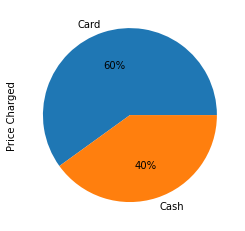

In [29]:
card_or_cash2.plot.pie(autopct='%.0f%%')

Thesis no. 5: Card payments are more frequent nowadays and constitute 60% both in terms of number of transactions and revenue.

### Hypothesis no. 6: cab market is stable business and there is no seasonality in the demand

In [30]:
# Yellow Cab long term profit analysis
yellow = cabs.loc[cabs['Company'] == 'Yellow Cab']
yellow.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
233,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,13.68
234,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,12.24
235,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,12.48
236,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,12.48
237,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,12.96


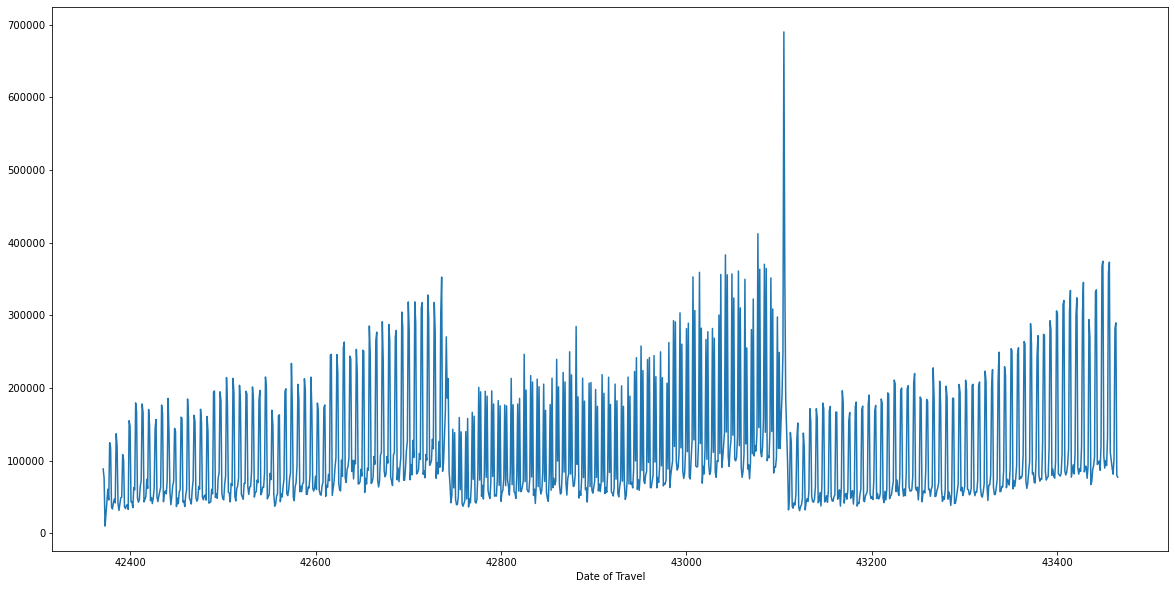

In [31]:
yellow.groupby(['Date of Travel'])['Price Charged'].sum().plot(figsize=(20,10))

In [32]:
# Yellow Cab long term profit analysis
pink = cabs.loc[cabs['Company'] == 'Pink Cab']
pink.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2


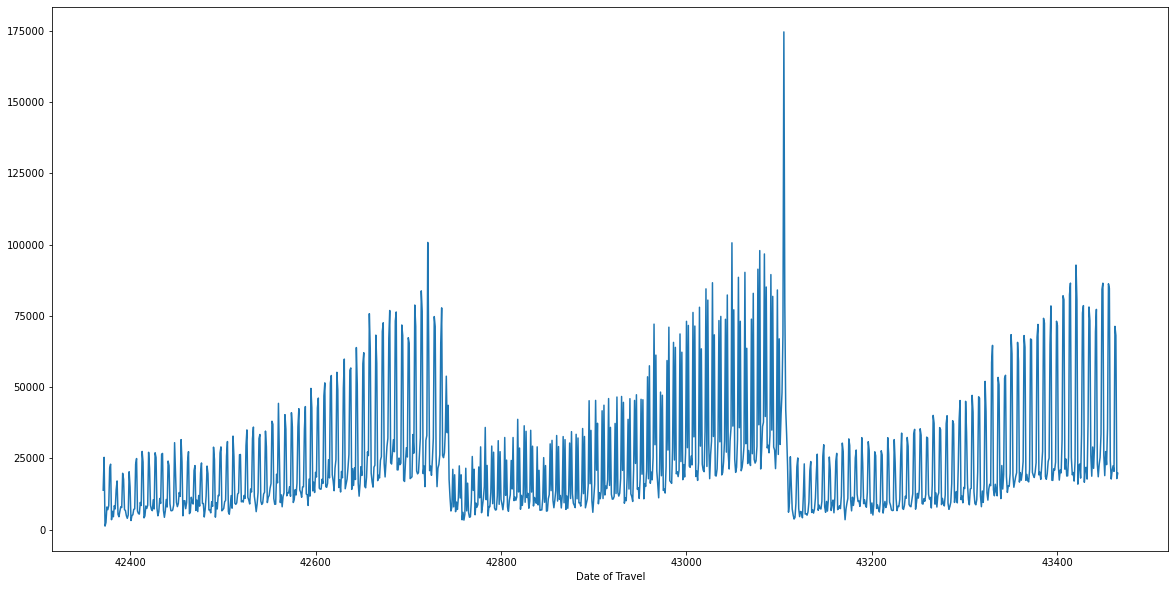

In [33]:
pink.groupby(['Date of Travel'])['Price Charged'].sum().plot(figsize=(20,10))

Thesis no. 5: Both Yellow and Pink Cab companies demonstrate similar annual trends with biggest demand in Autumn and Winter and indeed there is seasonality in weekly and seasonly demand.

### Joint dataframe for further modeling

In [38]:
jointDF = cost_per_km.merge(transactions, on='Transaction ID', how='left')
jointDF.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2,27182,Card


In [39]:
jointDF = jointDF.merge(customers, on='Customer ID', how='left')
jointDF.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2,27182,Card,Male,33,8536


In [42]:
jointDF.shape

(359392, 13)

In [43]:
jointDF.to_csv('jointDF.csv')

### Final thesis and recommendation for stakeholders

- Yellow Cab is better in terms of access to customers in big cities (over 1 million)
- Pink Cab has lower cost of operation
- both companies have similar profit trends within the year and seasonality in demand which grows bigger in second part of the year
- biggest cab markers are in NY, LA, Chicago, Boston and Washington D.C.
- consider equipping your cabs with card terminals since card payments are the most popular among customers